In [1]:
%matplotlib inline

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set(color_codes=True)

In [3]:
# load dataset
train_file = 'Dataset/training_463559_propdrop_iddrop.pkl'
test_file = 'Dataset/test_17846_propdrop_iddrop.pkl'

df_train = pd.read_pickle(train_file)
df_test = pd.read_pickle(test_file)

print("The shape of training_set:　", df_train.shape)
print("The shape of testing_set:　", df_test.shape)

The shape of training_set:　 (463559, 22)
The shape of testing_set:　 (17846, 21)


In [4]:
df_train_label = df_train.is_trade
df_train_1 = df_train
df_train = df_train.drop(['is_trade'], axis=1)

In [5]:
#g = sns.PairGrid(df_train, hue="is_trade")
#g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter)

In [6]:
def count_plot(train, test):
    candidate_cate_feature = ['item_category_list', 'user_gender_id', 'user_occupation_id', 'context_page_id', 'context_timestamp_hour', 'context_timestamp_weekday']
    tmp_train = train[candidate_cate_feature]
    tmp_test = test[candidate_cate_feature]
    for col in candidate_cate_feature:
        fig, ax =plt.subplots(1,2)
        sns.countplot(train[col], ax=ax[0])
        sns.countplot(test[col], ax=ax[1])
        
def dist_plot(train, test):
    num_feature = ['item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 'user_age_level', 'user_star_level', 'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level', 'shop_score_service', 'shop_score_delivery', 'shop_score_description']
    tmp_train = train[num_feature]
    tmp_test = test[num_feature]
    for col in num_feature:
        fig, ax =plt.subplots(1,2)
        sns.distplot(train[col], ax=ax[0])
        sns.distplot(test[col], ax=ax[1])

In [7]:
def compare_plot(d1, d2):
    for col in list(d1.columns):
        fig, ax =plt.subplots(1,2)
        count = 0
        for d in [d1, d2]:
            if d[col].dtype == 'float64':
                sns.distplot(d[col], ax=ax[count])
            else:
                sns.countplot(d[col], ax=ax[count])
            count = count + 1

/Users/cyy/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/cyy/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


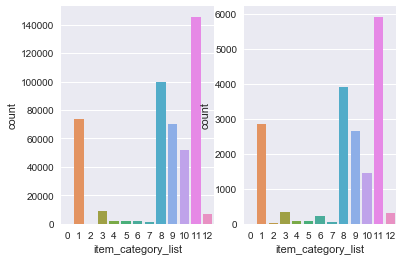

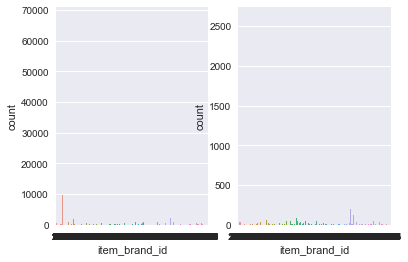

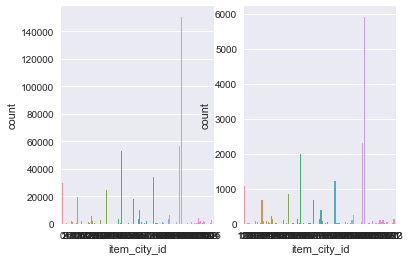

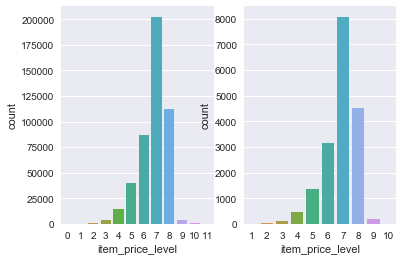

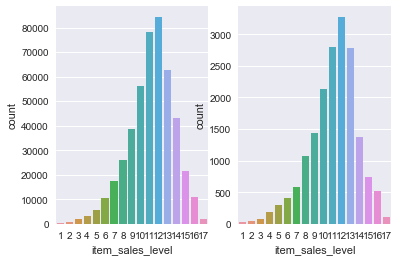

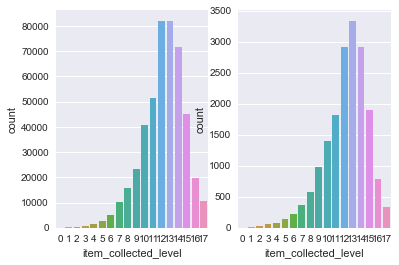

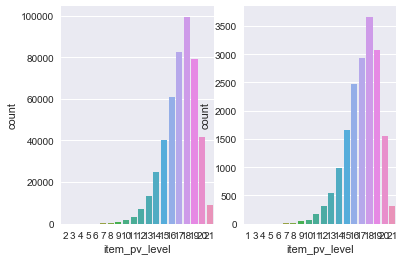

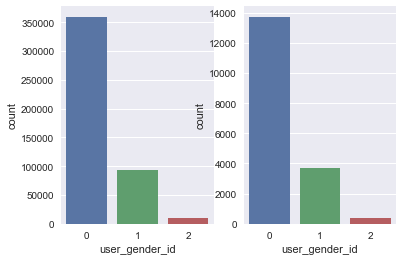

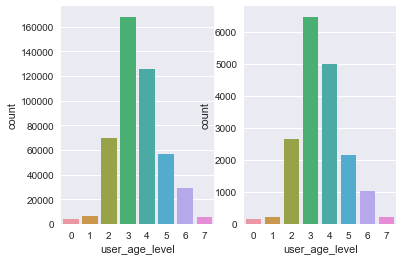

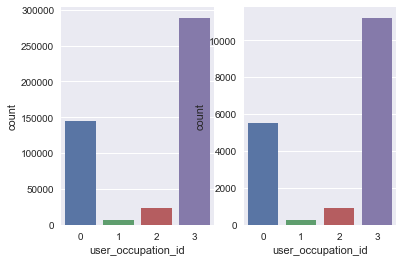

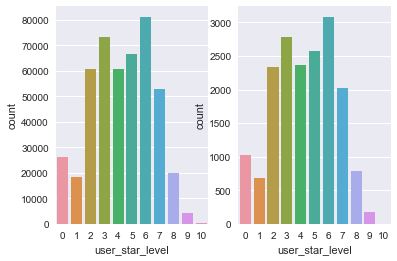

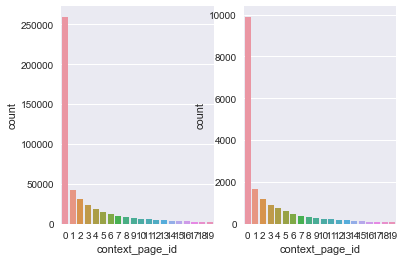

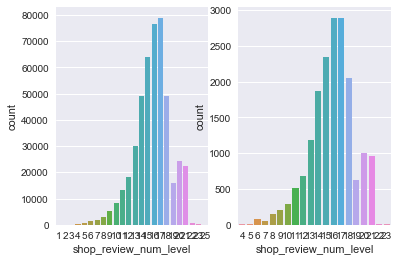

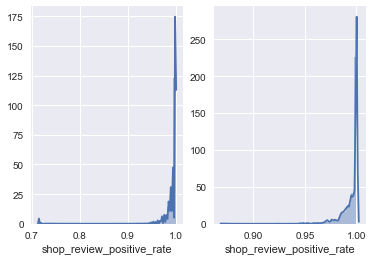

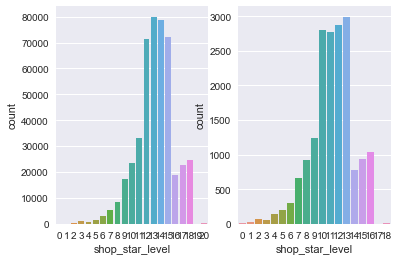

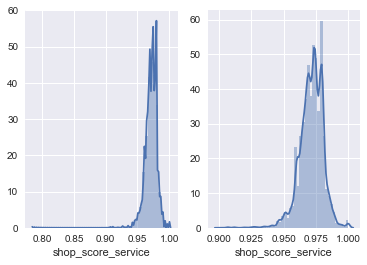

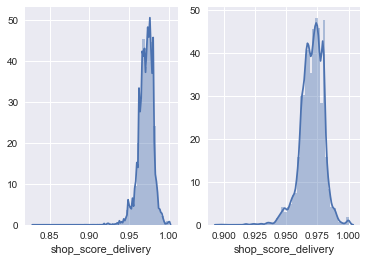

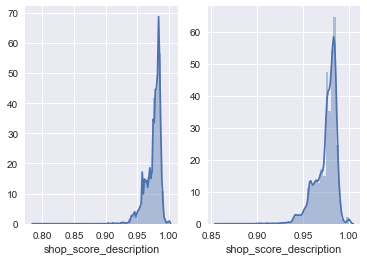

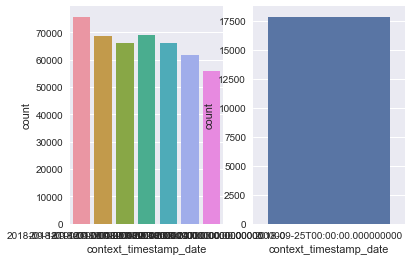

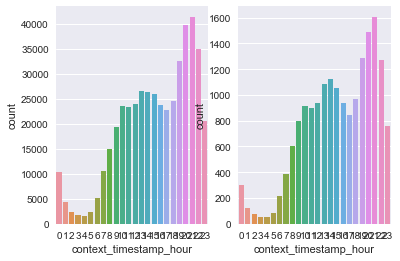

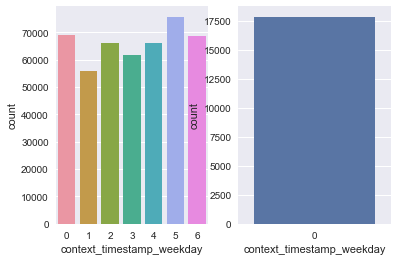

In [8]:
compare_plot(df_train, df_test)

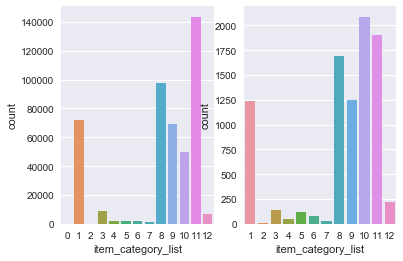

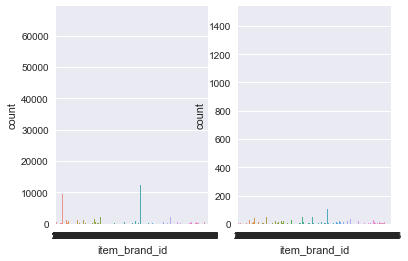

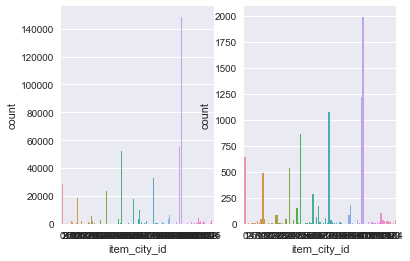

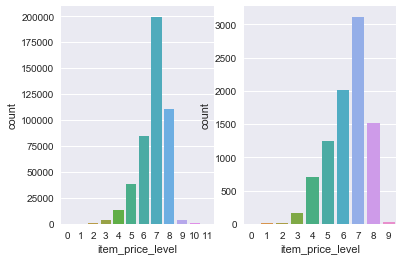

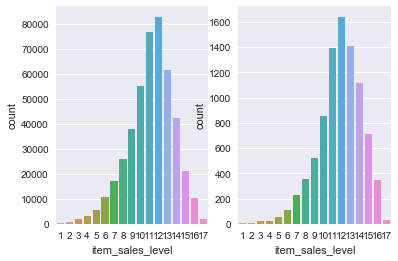

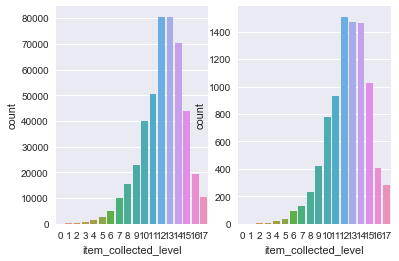

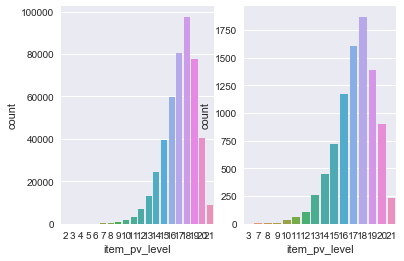

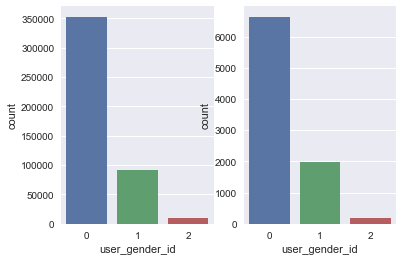

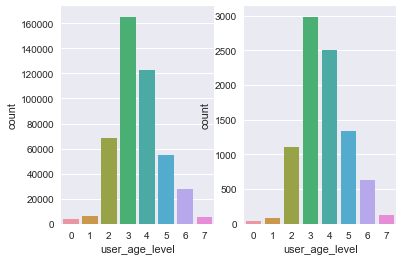

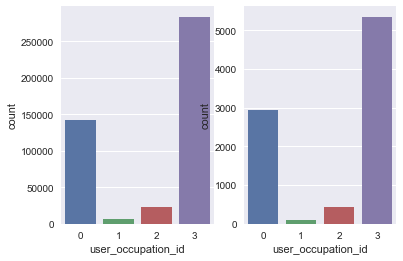

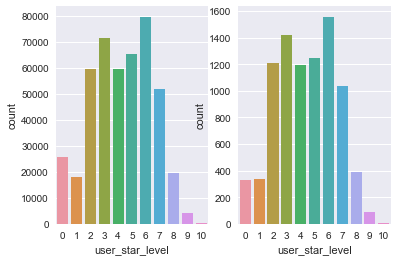

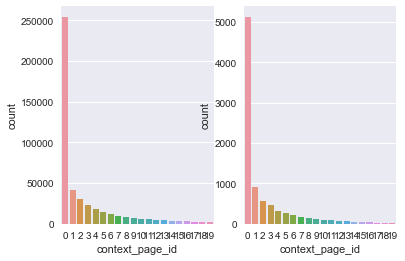

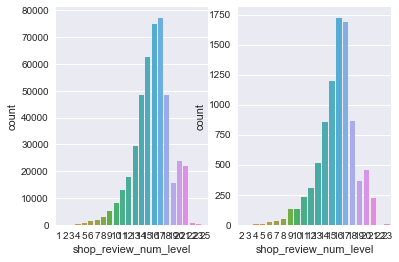

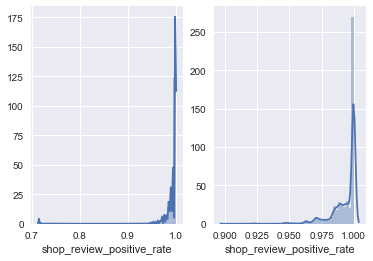

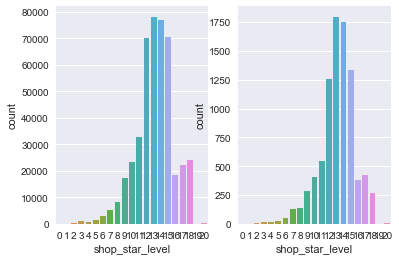

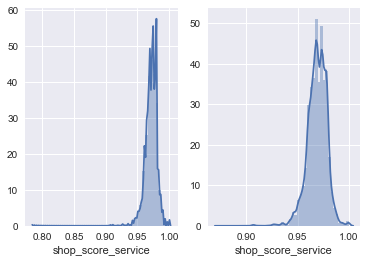

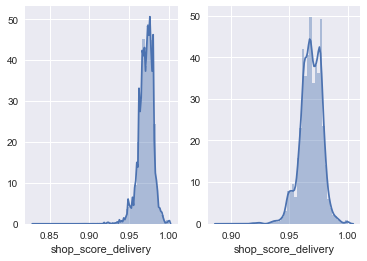

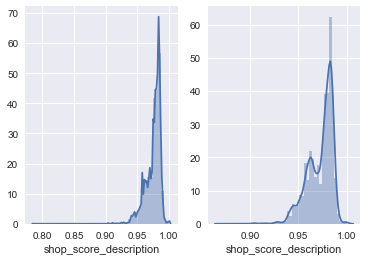

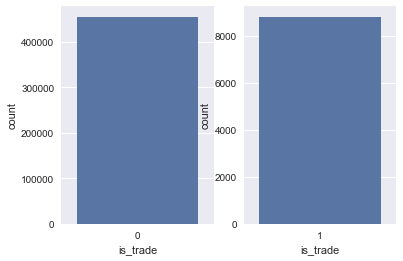

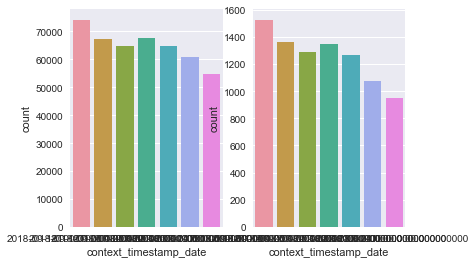

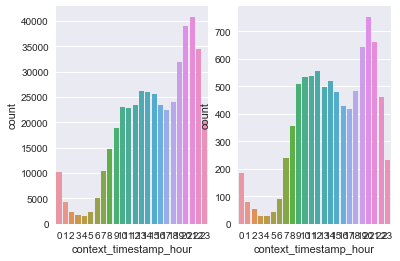

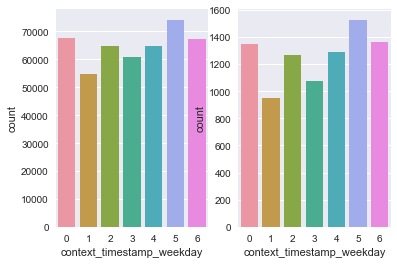

In [9]:
compare_plot(df_train_1[df_train_1.is_trade == 0], df_train_1[df_train_1.is_trade == 1])

In [10]:
num_feature = ['item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 'user_age_level', 'user_star_level', 'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level', 'shop_score_service', 'shop_score_delivery', 'shop_score_description']
df_train[num_feature].describe()

,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_age_level,user_star_level,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description
count,463559.000000,463559.000000,463559.000000,463559.000000,463559.000000,463559.000000,463559.000000,463559.000000,463559.000000,463559.000000,463559.000000,463559.000000
mean,6.777234,11.162398,12.215992,17.147843,3.543165,4.290138,15.780986,0.994894,13.187325,0.971409,0.970784,0.975142
std,1.088112,2.530013,2.473156,2.121150,1.213287,2.153788,2.820017,0.009146,2.585753,0.009325,0.009242,0.011977
min,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.714286,0.000000,0.786667,0.830000,0.786667
25%,6.000000,10.000000,11.000000,16.000000,3.000000,3.000000,14.000000,0.992812,12.000000,0.966398,0.965748,0.969331
50%,7.000000,11.000000,12.000000,17.000000,3.000000,4.000000,16.000000,1.000000,13.000000,0.972422,0.971667,0.978493
75%,8.000000,13.000000,14.000000,19.000000,4.000000,6.000000,17.000000,1.000000,15.000000,0.977839,0.977007,0.983638
max,11.000000,17.000000,17.000000,21.000000,7.000000,10.000000,25.000000,1.000000,20.000000,1.000000,1.000000,1.000000


In [11]:
#df_train.item_category_list.value_counts(normalize=True)

In [12]:
#df_train.shop_review_num_level.value_counts(normalize=True)

# Class (label) distribution

In [14]:
df_train_1.is_trade.value_counts(normalize=True)

0    0.980988
1    0.019012
Name: is_trade, dtype: float64

檢查class imbalance的程度，結果顯示沒有賣出去和賣出去的比例大概是49:1